## Data Collectie

by Kyra Jongman

## Inhoudsopgave

- Importeren packages
- Importeren data
- Functie
- Hoe ziet een conversatie eruit?
- Data transformeren
- EDA:
    1. Uit hoeveel conversaties bestaat de dataset?
    2. Wat is het minimale, maximale en gemiddelde aantal zinnen in een conversatie?
    3. Wat is de verdeling van het aantal zinnen in een conversatie?
    4. Hoe vaak is een hotel daadwerkelijk geboekt door een medewerker?
        4.1 Wat is het gemiddelde aantal zinnen in een conversatie waarbij een hotel geboekt wordt?
    5. Wat is het bedrag dat mensen per nacht willen  uitgeven?
        5.1 Wat is de verdeling binnen de laagste prijsklasse?
        5.2 Wat is de verdeling binnen de hoogste prijsklasse?
    6. Wat zijn de voorkeuren van mensen voor sterrenclassificatie van een hotel?
    7. Wat is het percentage antwoorden dat gegeven wordt door een gebruiker en een assistant?
    8. Wat is het percentage positieve en negatieve woorden in de conversatie?

### Importeren packages

In [80]:
from deep_translator import GoogleTranslator
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from price_parser import Price
import seaborn as sns
from currency_converter import CurrencyConverter
from nltk.tokenize import word_tokenize
import re
from word2number import w2n

### Importeren data

In [2]:
url = "https://raw.githubusercontent.com/google-research-datasets/Taskmaster/master/TM-2-2020/data/hotels.json"
df = pd.read_json(url)
df.head()

,conversation_id,instruction_id,utterances
0,dlg-0010a9d6-91c2-4b9b-ad73-33b44a8b5d42,hotel-2,"[{'index': 0, 'speaker': 'ASSISTANT', 'text': ..."
1,dlg-00131332-f7b3-4227-9672-652dd3a2c39e,hotel-1b,"[{'index': 0, 'speaker': 'USER', 'text': 'I'd ..."
2,dlg-00258574-83c8-4bb0-a0f0-4f744715cb27,hotel-1c,"[{'index': 0, 'speaker': 'USER', 'text': 'I'd ..."
3,dlg-0032fc41-9845-4be6-b9f5-0e6d898fda57,hotel-8,"[{'index': 0, 'speaker': 'ASSISTANT', 'text': ..."
4,dlg-003fa5f0-3457-464b-b22b-e74194fe172a,hotel-10,"[{'index': 0, 'speaker': 'ASSISTANT', 'text': ..."


### Functie

Deze functie kan aangeroepen worden door een lijst met bijvoorbeeld alle hotelnamen uit de dataset terug te krijgen

In [3]:
def get_list(list_name, search_term):
    list_name = []
    for index, conversations in df['utterances'].iteritems():
        for sentences in conversations:
            if 'segments' in sentences:
                for i in sentences['segments']:
                    if search_term in i['annotations'][0]['name']:
                        list_name.append((index, sentences['index'], i['text']))
    return list_name

Er kan uit de onderstaande namen gekozen worden om een lijst terug te krijgen

In [21]:
annotation_names =[]
for rows in df['utterances']:
    for item in rows:
        if 'segments' in item:
            annotation_names.append(item['segments'][0]['annotations'][0]['name'])
set(annotation_names)         

{'hotel1_detail.amenity',
 'hotel1_detail.customer_rating',
 'hotel1_detail.customer_review',
 'hotel1_detail.location',
 'hotel1_detail.name.hotel',
 'hotel1_detail.other_detail',
 'hotel1_detail.price_per_night',
 'hotel1_detail.star_rating',
 'hotel1_detail.total_fare',
 'hotel1_detail.type.room',
 'hotel2_detail.amenity',
 'hotel2_detail.customer_rating',
 'hotel2_detail.customer_review',
 'hotel2_detail.location',
 'hotel2_detail.name.hotel',
 'hotel2_detail.other_detail',
 'hotel2_detail.price_per_night',
 'hotel2_detail.star_rating',
 'hotel2_detail.total_fare',
 'hotel2_detail.type.room',
 'hotel3_detail.amenity',
 'hotel3_detail.customer_rating',
 'hotel3_detail.customer_review',
 'hotel3_detail.location',
 'hotel3_detail.name.hotel',
 'hotel3_detail.other_detail',
 'hotel3_detail.price_per_night',
 'hotel3_detail.star_rating',
 'hotel3_detail.type.room',
 'hotel4_detail.amenity',
 'hotel4_detail.customer_rating',
 'hotel4_detail.location',
 'hotel4_detail.name.hotel',
 'hotel

### Hoe ziet een conversatie eruit?

In [6]:
df['utterances'][0]

[{'index': 0, 'speaker': 'ASSISTANT', 'text': 'Hello! How can I help you?'},
 {'index': 1, 'speaker': 'USER', 'text': 'Hi, I would like to find a hotel.'},
 {'index': 2, 'speaker': 'ASSISTANT', 'text': 'Okay.'},
 {'index': 3,
  'speaker': 'ASSISTANT',
  'text': 'What else can you tell me about the hotel?'},
 {'index': 4,
  'speaker': 'USER',
  'text': 'Find a hotel near the beachfront.',
  'segments': [{'start_index': 13,
    'end_index': 32,
    'text': 'near the beachfront',
    'annotations': [{'name': 'hotel_search.sub_location.hotel'}]}]},
 {'index': 5,
  'speaker': 'ASSISTANT',
  'text': 'Okay beachfront in which town?',
  'segments': [{'start_index': 5,
    'end_index': 15,
    'text': 'beachfront',
    'annotations': [{'name': 'hotel_search.sub_location.hotel'}]}]},
 {'index': 6,
  'speaker': 'USER',
  'text': 'Oxnard California.',
  'segments': [{'start_index': 0,
    'end_index': 17,
    'text': 'Oxnard California',
    'annotations': [{'name': 'hotel_search.location.hotel'}]

### Data transformeren

In [5]:
conversation = {'conversation_id': [], 'response_id': [], 'speaker': [], 'text_response': []}
conversations_number = -1

for number_of_conversations in range(0, len(df)):
    conversations_number = conversations_number + 1
    for conversations in df.loc[number_of_conversations]['utterances']:
        conversation['conversation_id'].append(conversations_number)
        conversation['response_id'].append(conversations['index'])
        conversation['speaker'].append(conversations['speaker'])
        conversation['text_response'].append(conversations['text'])
        
df_normal = pd.DataFrame(conversation)
df_normal.to_csv('hotel_conversation_normal.csv', index=False)

hotel_conversation_normal = pd.read_csv('hotel_conversation_normal.csv')
hotel_conversation_normal.head(5)        

,conversation_id,response_id,speaker,text_response
0,0,0,ASSISTANT,Hello! How can I help you?
1,0,1,USER,"Hi, I would like to find a hotel."
2,0,2,ASSISTANT,Okay.
3,0,3,ASSISTANT,What else can you tell me about the hotel?
4,0,4,USER,Find a hotel near the beachfront.


### EDA

#### 1. Uit hoeveel conversaties bestaat de dataset?

In [8]:
print('De data bestaat uit: ' +  str(max(hotel_conversation_normal['conversation_id'])) + " conversaties ")

De data bestaat uit: 2356 conversaties 


#### 2. Wat is het minimale, maximale en gemiddelde aantal zinnen in een conversatie?

In [9]:
hotel_conversation_normal.groupby(['conversation_id']).size().describe()

count    2357.000000
mean       26.749258
std        10.221420
min         4.000000
25%        20.000000
50%        25.000000
75%        32.000000
max       187.000000
dtype: float64

C:\Users\kaj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


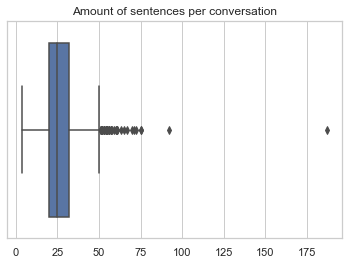

In [10]:
sns.set_theme(style="whitegrid")
sns.boxplot(hotel_conversation_normal.groupby('conversation_id').size()).set_title('Amount of sentences per conversation');

De bovenstaande grafiek laat een outlier zien. Dit is een aantal van 187 zinnen in een conversatie.

#### 3. Wat is de verdeling van het aantal zinnen in een conversatie?

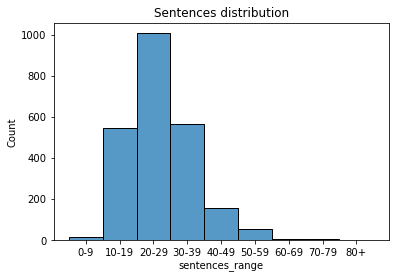

In [110]:
#New dataframe with sentences
df_sentences = pd.DataFrame(hotel_conversation_normal.groupby(['conversation_id']).size(), columns=['Aantal']).reset_index()

#Make sentences groups
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 200]
labels = ['0-9','10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_sentences['sentences_range'] = pd.cut(df_sentences.Aantal, bins, labels = labels,include_lowest = True)

#Make histogram of sentences groups
sns.histplot(data=df_sentences, x="sentences_range").set_title("Sentences distribution");

De bovenstaande grafiek toont het aantal zinnen per conversatie tussen een medewerker en klant. De grafiek laat zien dat de meeste gesprekken bestaan uit 10 tot 39 zinnen. Het gemiddelde aantal zinnen in een conversatie is ongeveer 27. Er zijn vrijwel geen gesprekken geweest met minder dan 10 zinnen en meer dan 60 zinnen. 

#### 4. Hoe vaak is een hotel daadwerkelijk geboekt door een medewerker?

In [85]:
hotel_booked = get_list('hotel_booked', 'hotel_booked')
print("Er zijn " + str(len(hotel_booked)) + " hotels geboekt in de conversaties")

Er zijn 772 hotels geboekt in de conversaties


In 33% van alle 2356 gesprekken (772) boekt de medewerker een hotel voor een klant. Dit is een relatief laag percentage wat kan betekenen dat enkele gesprekken abrupt afgebroken worden. Als dit het geval is, dan zou het lastig kunnen worden voor een digital human om een gesprek op een goede manier af te sluiten. 

4.1 Wat is gemiddelde aantal zinnen in een conversatie waarbij een hotel geboekt wordt?

C:\Users\kaj\AppData\Local\Temp/ipykernel_2976/3862321032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_booked_conversation['mean_sentences'] = not_booked_conversation['Aantal'].mean()
C:\Users\kaj\AppData\Local\Temp/ipykernel_2976/3862321032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_booked_conversation['category'] = 'not booked conversation'
C:\Users\kaj\AppData\Local\Temp/ipykernel_2976/3862321032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

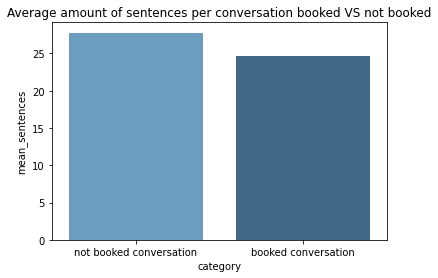

In [150]:
not_booked_conversation = df_sentences[~df_sentences['conversation_id'].isin([x[0] for x in hotel_booked])]
not_booked_conversation['mean_sentences'] = not_booked_conversation['Aantal'].mean()
not_booked_conversation['category'] = 'not booked conversation'

booked_conversation = df_sentences[df_sentences['conversation_id'].isin([x[0] for x in hotel_booked])]
booked_conversation['mean_sentences'] = booked_conversation['Aantal'].mean()
booked_conversation['category'] = 'booked conversation'

frames = [not_booked_conversation, booked_conversation]
result = pd.concat(frames).reset_index()

sns.barplot(x='category', y='mean_sentences', data=result, palette="Blues_d").set_title("Average amount of sentences per conversation booked VS not booked");

Er is geen duidelijk verschil te zien tussen het gemiddelde aantal zinnen in een conversatie waarbij wel en niet een hotel geboekt wordt.

#### 5. Wat is het bedrag dat mensen per nacht willen uitgeven?

In [22]:
price_range_customer = get_list('price_range', 'price_range')

words_in_text = []
for text in price_range_customer:
    txt = text[2].split(' ')
    for words in txt:
        words_in_text.append((text[0], text[1], Price.fromstring(str(words)).amount))
without_nones = [t for t in words_in_text if None not in t]  

#Get only user prices
user_prices_list = []
for index, row in hotel_conversation_normal.iterrows():
    for prices in without_nones:
        if prices[0] == row['conversation_id'] and prices[1] == row['response_id']:
            if row['speaker'] == 'USER':
                user_prices_list.append(prices)

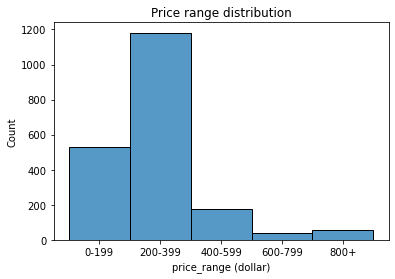

In [24]:
price_df = pd.DataFrame(set(user_prices_list), columns=['Conversation_ID', 'Text_Response_ID', 'Price'])

#Categorize prices into different groups
bins = [0, 199, 399, 599, 799, 10000]
labels = ['0-199', '200-399', '400-599', '600-799', '800+']
price_df["price_range (dollar)"] = pd.cut(price_df.Price, bins, labels = labels,include_lowest = True)

#Visualize price groups
sns.histplot(data=price_df, x="price_range (dollar)").set_title("Price range distribution");

De bovenstaande grafiek toont het bedrag in dollars dat klanten per nacht willen uitgeven. De grafiek laat zien dat ongeveer 1700 klanten bereid zijn om tussen de 0 en 400 dollar per nacht te betalen. 55 klanten hebben zelfs een budget van meer dan 800 dollar. Het gemiddelde bedrag dat klanten willen uitgeven per nacht is 301 dollar. Dit is een relatief hoog bedrag wat zou kunnen betekenen dat klanten bereid zijn veel te betalen of dat de bedragen in de data niet helemaal kloppen. 

5.1 Wat is de verdeling binnen de laagste prijsklasse?

C:\Users\kaj\AppData\Local\Temp/ipykernel_2976/155735201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_price_range["price_range (dollar)"] = pd.cut(lowest_price_range.Price, bins, labels = labels,include_lowest = True)


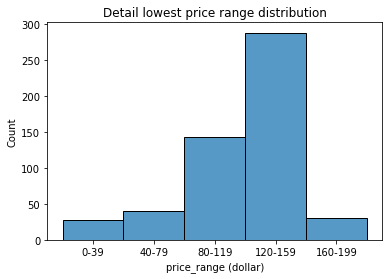

In [35]:
lowest_price_range = price_df[price_df['price_range (dollar)'] == '0-199']

bins = [0, 39, 79, 119, 159, 199]
labels = ['0-39', '40-79', '80-119', '120-159', '160-199']
lowest_price_range["price_range (dollar)"] = pd.cut(lowest_price_range.Price, bins, labels = labels,include_lowest = True)

sns.histplot(x = lowest_price_range['price_range (dollar)']).set_title("Detail lowest price range distribution");

In [167]:
lowest_price_range.groupby(['price_range (dollar)']).size()

price_range (dollar)
0-39        27
40-79       40
80-119     143
120-159    288
160-199     31
dtype: int64

De bovenstaande grafiek laat zien dat 67 klanten een hotel willen boeken die minder dan 80 dollar per nacht is. Er zijn maar weinig hotels waar je terecht kan met dit budget. Verwacht wordt dat sommige bedragen niet helemaal kloppen.

5.2 Wat is de verdeling binnen de hoogste prijsklasse?

C:\Users\kaj\AppData\Local\Temp/ipykernel_2976/2432593776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_price_range["price_range (dollar)"] = pd.cut(highest_price_range.Price, bins, labels = labels,include_lowest = True)


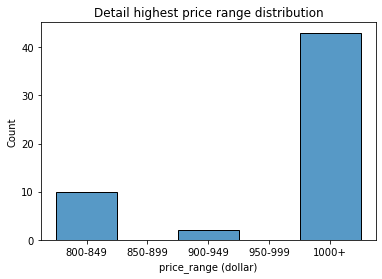

In [36]:
highest_price_range = price_df[price_df['price_range (dollar)'] == '800+']

bins = [799, 849, 899, 949, 999, 100000]
labels = ['800-849', '850-899', '900-949', '950-999', '1000+']
highest_price_range["price_range (dollar)"] = pd.cut(highest_price_range.Price, bins, labels = labels,include_lowest = True)

sns.histplot(x = highest_price_range['price_range (dollar)']).set_title("Detail highest price range distribution");

De bovenstaande grafiek laat zien dat 43 klanten een hotel willen boeken die meer dan 1000 dollar per nacht is. Er zijn maar weinig hotels waar je terecht kan met dit budget. Verwacht wordt dat sommige bedragen in de dataset niet helemaal kloppen.

In [112]:
print("Dit is een voorbeeld van een erg hoog bedrag dat iemand per nacht wilt betalen:                                                " + 
      hotel_conversation_normal.loc[46923]['text_response'])

Dit is een voorbeeld van een erg hoog bedrag dat iemand per nacht wilt betalen:                                                The price range on them is $4,300 or less per night.


#### 6. Wat zijn de voorkeuren van mensen voor sterrenclassificatie van een hotel?

In [7]:
customer_rating = get_list('customer_rating', 'customer_rating')

ratings_list = []
for text in customer_rating:
    for words in re.split(' |-', text[2]):
        try:
            ratings_list.append((text[0], text[1], float(words)))
        except ValueError:
            try:
                ratings_list.append((text[0], text[1], w2n.word_to_num(words)))
            except ValueError:
                pass
            
#Get only user ratings
user_rating_list = []
for index, row in hotel_conversation_normal.iterrows():
    for rating in ratings_list:
        if rating[0] == row['conversation_id'] and rating[1] == row['response_id']:
            if row['speaker'] == 'USER':
                user_rating_list.append(rating)            

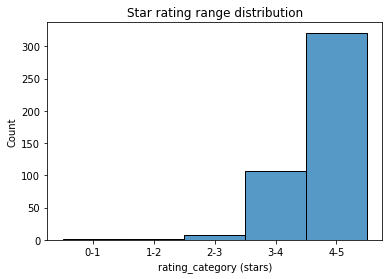

In [10]:
rating_df = pd.DataFrame(set(user_rating_list), columns=['Conversation_ID', 'Text_Response_ID', 'Rating'])

#Categorize prices into different groups
bins = [0, 0.9, 1.9, 2.9, 3.9, 5.9]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
rating_df['rating_category (stars)'] = pd.cut(rating_df.Rating, bins, labels = labels,include_lowest = True)

#Visualize price groups
sns.histplot(data=rating_df, x='rating_category (stars)').set_title("Star rating range distribution");

De bovenstaande grafiek toont de verdeling van het aantal sterren van een hotel. De grafiek laat zien dat klanten graag overnachten in een hotel met drie sterren of meer. Meer dan 300 klanten verblijven zelfs het liefst in een vier tot vijf sterrenhotel. Dit komt tevens overheen met het bedrag dat klanten per nacht willen betalen. 

#### 7. Wat is het percentage antwoorden dat gegeven wordt door een gebruiker en een assistant?

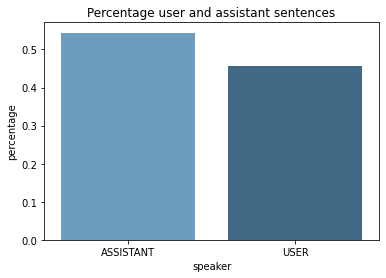

In [11]:
df_assistant_vs_user = hotel_conversation_normal.groupby(['speaker']).size().reset_index()
df_assistant_vs_user.rename(columns={0: 'aantal'}, inplace=True)

totaal = sum(df_assistant_vs_user['aantal'])
percentage_list = []
for i in range(0, len(df_assistant_vs_user)):
    percentage_list.append(df_assistant_vs_user.loc[i]['aantal']/totaal)
df_assistant_vs_user['percentage'] = percentage_list

sns.barplot(x='speaker', y='percentage', data=df_assistant_vs_user, palette="Blues_d").set_title("Percentage user and assistant sentences");

De bovenstaande grafiek toont de gespreksverdeling tussen een medewerker en een klant. De grafiek laat zien dat de klantenservice met 54% een iets groter aandeel in de gesprekken heeft dan de klant (46%). Dit is conform het verwachtingspatroon van een klantenservice. De klantenservice medewerker is toch degene die de meeste vragen stelt om een klant te helpen. 

#### 8. Wat is het percentage positieve en negatieve woorden in de conversaties?

In [59]:
positive_file = open("positive-words.txt", "r").read()
positive_words = positive_file.splitlines()
positiveword_count_list = []

#Check amount of words and positive words for each sentences in conversations
for index, response in hotel_conversation_normal['text_response'].iteritems():
    amountwords = len(word_tokenize(response))
    positivewords = [word for word in word_tokenize(response) if word in positive_words]
    positiveword_count_list.append((index, amountwords, len(positivewords)))

#Make new dataframe with amount of words and positive words
df_positive = pd.DataFrame(columns=['index', 'conversation_id', 'amount_words', 'count', 'segment'])
df_positive['index'] = [index[0] for index in positiveword_count_list]
df_positive['amount_words'] = [amount_words[1] for amount_words in positiveword_count_list]
df_positive['count'] = [positive_count[2] for positive_count in positiveword_count_list]
df_positive['conversation_id'] = hotel_conversation_normal['conversation_id']
df_positive['segment'] = 'Positive'

#Sum amount of words and positive words for each conversation
df_positive = df_positive.groupby(['conversation_id', 'segment'])['count', 'amount_words'].sum().reset_index()

C:\Users\kaj\AppData\Local\Temp/ipykernel_2976/2481010589.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_positive = df_positive.groupby(['conversation_id', 'segment'])['count', 'amount_words', 'segment'].sum().reset_index()


In [61]:
negative_file = open("negative-words.txt", "r").read()
negative_words = negative_file.splitlines()
negativeword_count_list = []

#Check amount of words and positive words for each sentences in conversations
for index, response in hotel_conversation_normal['text_response'].iteritems():
    amountwords = len(word_tokenize(response))
    negativewords = [word for word in word_tokenize(response) if word in negative_words]
    negativeword_count_list.append((index, amountwords, len(negativewords)))

#Make new dataframe with amount of words and positive words
df_negative = pd.DataFrame(columns=['index', 'conversation_id', 'amount_words', 'count', 'segment'])
df_negative['index'] = [index[0] for index in negativeword_count_list]
df_negative['amount_words'] = [amount_words[1] for amount_words in negativeword_count_list]
df_negative['count'] = [negative_count[2] for negative_count in negativeword_count_list]
df_negative['conversation_id'] = hotel_conversation_normal['conversation_id']
df_negative['segment'] = 'Negative'

#Sum amount of words and positive words for each conversation
df_negative = df_negative.groupby(['conversation_id', 'segment'])['count', 'amount_words'].sum().reset_index()

C:\Users\kaj\AppData\Local\Temp/ipykernel_2976/2927374346.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_negative = df_negative.groupby(['conversation_id', 'segment'])['count', 'amount_words'].sum().reset_index()


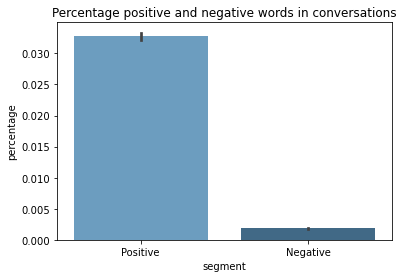

In [79]:
frames = [df_positive, df_negative]
result = pd.concat(frames).reset_index()

#Calculate percentage
percentage_list = []
for i in range(0, len(result)):
    percentage_list.append(result.loc[i]['count']/result.loc[i]['amount_words'])
result['percentage'] = percentage_list

#Make plot
sns.barplot(x='segment', y='percentage', data=result, palette="Blues_d").set_title('Percentage positive and negative words in conversations');

De bovenstaande grafiek toont het aantal positieve en negatieve woorden in de conversaties. Dit aantal is zo laag. 3% van de woorden in de conversaties is namelijk maar positief. Dit betekent dat er geen sentiment analyse uitgevoerd hoeft te worden. 